# 🚗🔋 Electric Vehicle Dataset

In [126]:
# Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import seaborn as sns

analisis de comparion
https://www.kaggle.com/code/mariusborel/eda-electric-vehicle-spec-2025#Data-loading-nd-overview

# -------------------
# 1. 🏋️‍♂️ Carga del dato
# -------------------

In [127]:

#1. Cargar los datos de trainmod (Los creados en el apartado anterior).
df = pd.read_csv(r"C:\americo\ia_dema\z-ejercicios_kaggle\Vehicles_elect_2025\data_real\electric_vehicles_spec_2025.csv",sep=",",encoding='latin-1')

### 1. Conocer las filas y columnas de la tabla

        El atributo df.shape te devuelve un tuple (n_filas, n_columnas) y sirve para:

        🧮 Conocer rápido el tamaño del DataFrame (número total de registros y variables).

        🔍 Validar que la carga y limpieza de datos mantenga (o cambie) el número esperado de filas/columnas.

        🛠️ Ajustar bucles o particiones: for i in range(df.shape[0]) o al dividir el dataset en train/test.

        📊 Documentar tu EDA: “Empezamos con 10 000×20 y, tras eliminar duplicados y nulos, quedamos en 9 500×18”.

In [128]:
print(df.shape)          # e.g. (10000, 20)
n_rows, n_cols = df.shape
print(f"Filas: {n_rows} — Columnas: {n_cols}")

(478, 22)
Filas: 478 — Columnas: 22


# ---------------------
# 📑 2. Mostrar estructura de los datos
#  ---------------------

### 2.1 Visualizamos el contenido

In [129]:
print("=== head() ===")
df.head()

=== head() ===


,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,...,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5


### 2.2 Visualizamos la info

In [130]:
print("\n=== info() ===")
df.info()


=== info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    float64
 13  cargo_volume_l             477 non

### 2.3 Visualizamos los tipos de datos

In [131]:
df.dtypes.value_counts().rename_axis('dtype').reset_index(name='n_columnas')

,dtype,n_columnas
0,object,9
1,int64,7
2,float64,6


### 2.4 Realizar un resumen estadístico de los datos.

    - .describe

        Por defecto describe() solo resume las columnas numéricas.

    - include='all'

        Con include='all' le indicas que muestre estadísticas de todas las columnas, incluidas las de tipo objeto (strings), categorías, fechas…

        Así obtienes, además de media y cuantiles, conteo de valores únicos, el valor más frecuente (top) y su frecuencia (freq) para columnas no numéricas.

    - .T

        Es el transpose (transposición). Cambia filas ↔ columnas en el DataFrame resultante.

        Hace que cada estadístico (count, mean, unique, top…) sea una fila y cada columna de tu dataset sea una columna.

        Facilita la lectura cuando tienes pocas columnas pero muchos estadísticos, o quieres exportar resultados orientados por variable.

In [132]:
print("\n=== describe().T ===")
df.describe().T


=== describe().T ===


,count,mean,std,min,25%,50%,75%,max
top_speed_kmh,478.0,185.487448,34.252773,125.0,160.0,180.00,201.00,325.0
battery_capacity_kWh,478.0,74.043724,20.331058,21.3,60.0,76.15,90.60,118.0
number_of_cells,276.0,485.293478,1210.819733,72.0,150.0,216.00,324.00,7920.0
torque_nm,471.0,498.012739,241.461128,113.0,305.0,430.00,679.00,1350.0
efficiency_wh_per_km,478.0,162.903766,34.317532,109.0,143.0,155.00,177.75,370.0
range_km,478.0,393.179916,103.287335,135.0,320.0,397.50,470.00,685.0
acceleration_0_100_s,478.0,6.882636,2.730696,2.2,4.8,6.60,8.20,19.1
fast_charging_power_kw_dc,477.0,125.008386,58.205012,29.0,80.0,113.00,150.00,281.0
towing_capacity_kg,452.0,1052.261062,737.851774,0.0,500.0,1000.00,1600.00,2500.0
seats,478.0,5.263598,1.003961,2.0,5.0,5.00,5.00,9.0


In [133]:
print("\n=== describe(include='all') ===")
df.describe(include='all')


=== describe(include='all') ===


,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
count,478,477,478.000000,478.000000,478,276.000000,471.000000,478.000000,478.000000,478.000000,...,452.000000,477,478.000000,478,478,478.000000,478.000000,478.000000,478,478
unique,59,477,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,...,NaN,140,NaN,3,15,NaN,NaN,NaN,8,478
top,Mercedes-Benz,500e Convertible,NaN,NaN,Lithium-ion,NaN,NaN,NaN,NaN,NaN,...,NaN,520,NaN,AWD,JC - Medium,NaN,NaN,NaN,SUV,https://ev-database.org/car/1904/Abarth-500e-C...
freq,42,1,NaN,NaN,478,NaN,NaN,NaN,NaN,NaN,...,NaN,17,NaN,191,91,NaN,NaN,NaN,244,1
mean,NaN,NaN,185.487448,74.043724,NaN,485.293478,498.012739,162.903766,393.179916,6.882636,...,1052.261062,NaN,5.263598,NaN,NaN,4678.506276,1887.359833,1601.125523,NaN,NaN
std,NaN,NaN,34.252773,20.331058,NaN,1210.819733,241.461128,34.317532,103.287335,2.730696,...,737.851774,NaN,1.003961,NaN,NaN,369.210573,73.656807,130.754851,NaN,NaN
min,NaN,NaN,125.000000,21.300000,NaN,72.000000,113.000000,109.000000,135.000000,2.200000,...,0.000000,NaN,2.000000,NaN,NaN,3620.000000,1610.000000,1329.000000,NaN,NaN
25%,NaN,NaN,160.000000,60.000000,NaN,150.000000,305.000000,143.000000,320.000000,4.800000,...,500.000000,NaN,5.000000,NaN,NaN,4440.000000,1849.000000,1514.000000,NaN,NaN
50%,NaN,NaN,180.000000,76.150000,NaN,216.000000,430.000000,155.000000,397.500000,6.600000,...,1000.000000,NaN,5.000000,NaN,NaN,4720.000000,1890.000000,1596.000000,NaN,NaN
75%,NaN,NaN,201.000000,90.600000,NaN,324.000000,679.000000,177.750000,470.000000,8.200000,...,1600.000000,NaN,5.000000,NaN,NaN,4961.000000,1939.000000,1665.000000,NaN,NaN


# -------------------
# 🔍👨‍💻 3. Localizar valores null / NaN / Vacios
# -------------------

### 3.1 Encontramos las columnas con falta de informacion y/o Nan

In [134]:
print("----- TOTAL DE FILAS ----- ")    
n_rows = len(df)
n_rows

----- TOTAL DE FILAS ----- 


478

In [135]:
print("-------Total de valores no nulos por columna ---")
non_null_counts = df.count()
non_null_counts

-------Total de valores no nulos por columna ---


brand                        478
model                        477
top_speed_kmh                478
battery_capacity_kWh         478
battery_type                 478
number_of_cells              276
torque_nm                    471
efficiency_wh_per_km         478
range_km                     478
acceleration_0_100_s         478
fast_charging_power_kw_dc    477
fast_charge_port             477
towing_capacity_kg           452
cargo_volume_l               477
seats                        478
drivetrain                   478
segment                      478
length_mm                    478
width_mm                     478
height_mm                    478
car_body_type                478
source_url                   478
dtype: int64

In [136]:
print("-------Filtrar columnas cuyo conteo de no-nulos sea menor al número total de filas ---")

incomplete = non_null_counts[ non_null_counts < n_rows ]
incomplete

-------Filtrar columnas cuyo conteo de no-nulos sea menor al número total de filas ---


model                        477
number_of_cells              276
torque_nm                    471
fast_charging_power_kw_dc    477
fast_charge_port             477
towing_capacity_kg           452
cargo_volume_l               477
dtype: int64

In [137]:
print("----Columnas con datos incompletos")
for col, cnt in incomplete.items():
    pct = cnt / n_rows * 100
    print(f"– {col}: {cnt} non-null de {n_rows} ({pct:.1f}%)")


----Columnas con datos incompletos
– model: 477 non-null de 478 (99.8%)
– number_of_cells: 276 non-null de 478 (57.7%)
– torque_nm: 471 non-null de 478 (98.5%)
– fast_charging_power_kw_dc: 477 non-null de 478 (99.8%)
– fast_charge_port: 477 non-null de 478 (99.8%)
– towing_capacity_kg: 452 non-null de 478 (94.6%)
– cargo_volume_l: 477 non-null de 478 (99.8%)


In [138]:
print("----DataFrame de resumen")

# Obtener el dtype de cada columna
dtypes = df.dtypes[incomplete.index]

# Crear el DataFrame de resumen con el dtype incluido
incomplete_df = pd.DataFrame({
    'dtype':      dtypes,  # Tipo de dato de la columna
    'non_null':   incomplete,  # Cantidad de valores no nulos
    'null_count': n_rows - incomplete,  # Cantidad de valores nulos
    'null_pct':   (n_rows - incomplete) / n_rows * 100  # Porcentaje de valores nulos
})

print("\nResumen en DataFrame:\n", incomplete_df)


----DataFrame de resumen

Resumen en DataFrame:
                              dtype  non_null  null_count   null_pct
model                       object       477           1   0.209205
number_of_cells            float64       276         202  42.259414
torque_nm                  float64       471           7   1.464435
fast_charging_power_kw_dc  float64       477           1   0.209205
fast_charge_port            object       477           1   0.209205
towing_capacity_kg         float64       452          26   5.439331
cargo_volume_l              object       477           1   0.209205


# -------------------
# 👨‍💻🔄 4. Transformar el dato
# -------------------

### 4.1 Detectamos el total de NaN,Null,Vacios

In [139]:
# 1) Calcula null_count y dtype por columna
nulls_info = (
    df.isnull()                          
      .sum()                             
      .to_frame(name='null_count')      
      .assign(dtype=df.dtypes)          
      .reset_index()                     
      .rename(columns={'index':'column'})
)

# 2) Filtra para mostrar solo las columnas con null_count > 0
nulls_info = nulls_info[nulls_info['null_count'] > 0]

print(nulls_info)


                       column  null_count    dtype
1                       model           1   object
5             number_of_cells         202  float64
6                   torque_nm           7  float64
10  fast_charging_power_kw_dc           1  float64
11           fast_charge_port           1   object
12         towing_capacity_kg          26  float64
13             cargo_volume_l           1   object


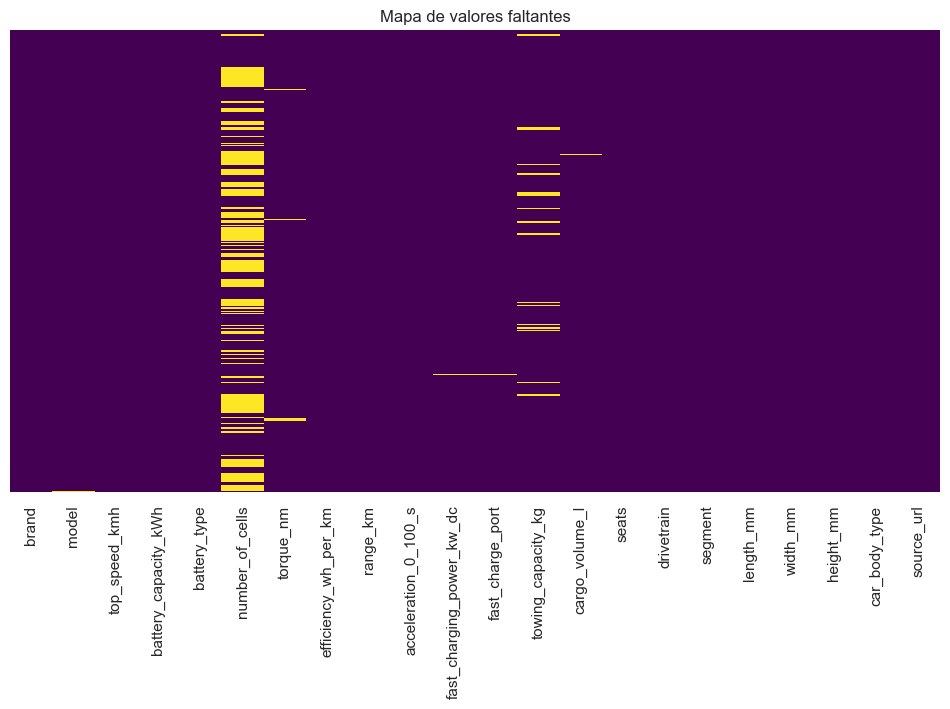

In [140]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), 
            cbar=False, 
            yticklabels=False, 
            cmap='viridis')
plt.title('Mapa de valores faltantes')
plt.show()

### 4.1 Imputar valores numéricos con la mediana

In [141]:
num_with_null = [c for c in num_cols if df[c].isnull().any()]
print("-----lista de nombres de columnas numéricas null-----")
num_with_null

-----lista de nombres de columnas numéricas null-----


['number_of_cells',
 'torque_nm',
 'fast_charging_power_kw_dc',
 'towing_capacity_kg']

In [142]:
# Imputar valores nulos en columnas numéricas con la mediana
for col in num_with_null:
    med = df[col].median()  # Calcular la mediana de la columna
    #df[col].fillna(med, inplace=True) esta obsoleto
    df[col] = df[col].fillna(med)  # Asignar la columna imputada correctamente
    print(f"→ {col}: imputados {df[col].isnull().sum()} nulos con mediana {med}")


→ number_of_cells: imputados 0 nulos con mediana 216.0
→ torque_nm: imputados 0 nulos con mediana 430.0
→ fast_charging_power_kw_dc: imputados 0 nulos con mediana 113.0
→ towing_capacity_kg: imputados 0 nulos con mediana 1000.0


In [143]:
df.select_dtypes(include='number').isnull().sum()

top_speed_kmh                0
battery_capacity_kWh         0
number_of_cells              0
torque_nm                    0
efficiency_wh_per_km         0
range_km                     0
acceleration_0_100_s         0
fast_charging_power_kw_dc    0
towing_capacity_kg           0
seats                        0
length_mm                    0
width_mm                     0
height_mm                    0
dtype: int64

### 4.2 Imputar valores categóricos con la moda

In [144]:
# Identificamos columnas “object” o “category” con nulos
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print("-----selecciona las columnas object o category null-----")
cat_cols


-----selecciona las columnas object o category null-----


Index(['brand', 'model', 'battery_type', 'fast_charge_port', 'cargo_volume_l',
       'drivetrain', 'segment', 'car_body_type', 'source_url'],
      dtype='object')

In [145]:
print("-----lista de nombres de columnas categóricas null/NaN-----")
cat_with_null = [c for c in cat_cols if df[c].isnull().any()]
cat_with_null

-----lista de nombres de columnas categóricas null/NaN-----


['model', 'fast_charge_port', 'cargo_volume_l']

In [146]:
print("--Imputar valores nulos en columnas categóricas con la moda---")
# Imputar valores nulos en columnas categóricas con la moda
for col in cat_with_null:
    mode = df[col].mode()[0]  # Obtener la moda de la columna
    df[col] = df[col].fillna(mode)  # Asignar la columna imputada correctamente
    print(f"→ {col}: imputados {df[col].isnull().sum()} nulos con moda '{mode}'")


--Imputar valores nulos en columnas categóricas con la moda---
→ model: imputados 0 nulos con moda '#1 Brabus'
→ fast_charge_port: imputados 0 nulos con moda 'CCS'
→ cargo_volume_l: imputados 0 nulos con moda '520'


In [147]:
df.select_dtypes(include='object').isnull().sum()

brand               0
model               0
battery_type        0
fast_charge_port    0
cargo_volume_l      0
drivetrain          0
segment             0
car_body_type       0
source_url          0
dtype: int64

### 4.3 Mostramo toda la estructura

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      478 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            478 non-null    float64
 6   torque_nm                  478 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  478 non-null    float64
 11  fast_charge_port           478 non-null    object 
 12  towing_capacity_kg         478 non-null    float64
 13  cargo_volume_l             478 non-null    object 

# --------------------------------------------
# 🔍👨‍💻 5. Determinar las categorías existentes  
# --------------------------------------------

    - lo podemos hacer de tres maneras:
      - .unique()
      - .value_counts()
      - .describe()


In [149]:
import pandas as pd

obj_cols = df.select_dtypes(include='object').columns

df_desc2 = pd.DataFrame({
    col: df[col].describe() 
    for col in obj_cols
}).T.reset_index().rename(columns={'index':'column'})

df_desc2


,column,count,unique,top,freq
0,brand,478,59,Mercedes-Benz,42
1,model,478,477,#1 Brabus,2
2,battery_type,478,1,Lithium-ion,478
3,fast_charge_port,478,2,CCS,477
4,cargo_volume_l,478,140,520,18
5,drivetrain,478,3,AWD,191
6,segment,478,15,JC - Medium,91
7,car_body_type,478,8,SUV,244
8,source_url,478,478,https://ev-database.org/car/1904/Abarth-500e-C...,1


In [150]:
print("--------agrupacion segment--------")
df_segment = df["segment"].groupby(df["segment"]).count().sort_values(ascending=False)
print(df_segment)
print("")
print("--------agrupacion drivetrain--------")
df_drivetrain = df["drivetrain"].groupby(df["drivetrain"]).count().sort_values(ascending=False)
print(df_drivetrain)
print("")
print("--------agrupacion fast_charge_port--------")
df_fast_charge_port = df["fast_charge_port"].groupby(df["fast_charge_port"]).count().sort_values(ascending=False)
print(df_fast_charge_port)
print("")
print("--------agrupacion car_body_type--------")
df_car_body_type = df["car_body_type"].groupby(df["car_body_type"]).count().sort_values(ascending=False)
print(df_car_body_type)
print("")


--------agrupacion segment--------
segment
JC - Medium          91
JD - Large           58
F - Luxury           51
N - Passenger Van    47
JB - Compact         44
C - Medium           34
E - Executive        30
JF - Luxury          30
B - Compact          29
D - Large            28
JE - Executive       28
A - Mini              3
G - Sports            2
JA - Mini             2
I - Luxury            1
Name: segment, dtype: int64

--------agrupacion drivetrain--------
drivetrain
AWD    191
FWD    156
RWD    131
Name: drivetrain, dtype: int64

--------agrupacion fast_charge_port--------
fast_charge_port
CCS        477
CHAdeMO      1
Name: fast_charge_port, dtype: int64

--------agrupacion car_body_type--------
car_body_type
SUV                    244
Sedan                   63
Hatchback               57
Small Passenger Van     47
Liftback Sedan          33
Station/Estate          27
Cabriolet                5
Coupe                    2
Name: car_body_type, dtype: int64



# -----------------------------------
# 📊👨‍💻 6.CREAMOS DF PARA LOS GRAFICOS
# -----------------------------------

In [151]:
df_num = df.select_dtypes(include=[np.number])
df_num

,top_speed_kmh,battery_capacity_kWh,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,towing_capacity_kg,seats,length_mm,width_mm,height_mm
0,155,37.8,192.0,235.0,156,225,7.0,67.0,0.0,4,3673,1683,1518
1,155,37.8,192.0,235.0,149,225,7.0,67.0,0.0,4,3673,1683,1518
2,200,50.8,102.0,345.0,158,280,5.9,79.0,0.0,5,4187,1779,1557
3,200,50.8,102.0,345.0,158,280,6.2,79.0,0.0,5,4187,1779,1557
4,150,60.0,216.0,310.0,156,315,7.5,78.0,1000.0,5,4680,1865,1700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,210,71.0,216.0,440.0,148,365,6.0,240.0,2000.0,5,4787,1930,1650
474,190,49.0,216.0,343.0,148,265,5.9,70.0,1600.0,5,4432,1836,1566
475,190,65.0,216.0,343.0,146,360,5.6,114.0,1600.0,5,4432,1836,1566
476,190,65.0,216.0,543.0,153,350,3.8,114.0,1600.0,5,4432,1836,1566


In [152]:
df_num.columns

Index(['top_speed_kmh', 'battery_capacity_kWh', 'number_of_cells', 'torque_nm',
       'efficiency_wh_per_km', 'range_km', 'acceleration_0_100_s',
       'fast_charging_power_kw_dc', 'towing_capacity_kg', 'seats', 'length_mm',
       'width_mm', 'height_mm'],
      dtype='object')

In [153]:
df_total = df.copy()

# -----------------------------------
# 📉👨‍💻📈 7.  Gráficos para análisis
# -----------------------------------

### 1.- Analisis categira vs numericos

1.1- Boxplot Muestra mediana, cuartiles y outliers de un numérico por categoría.

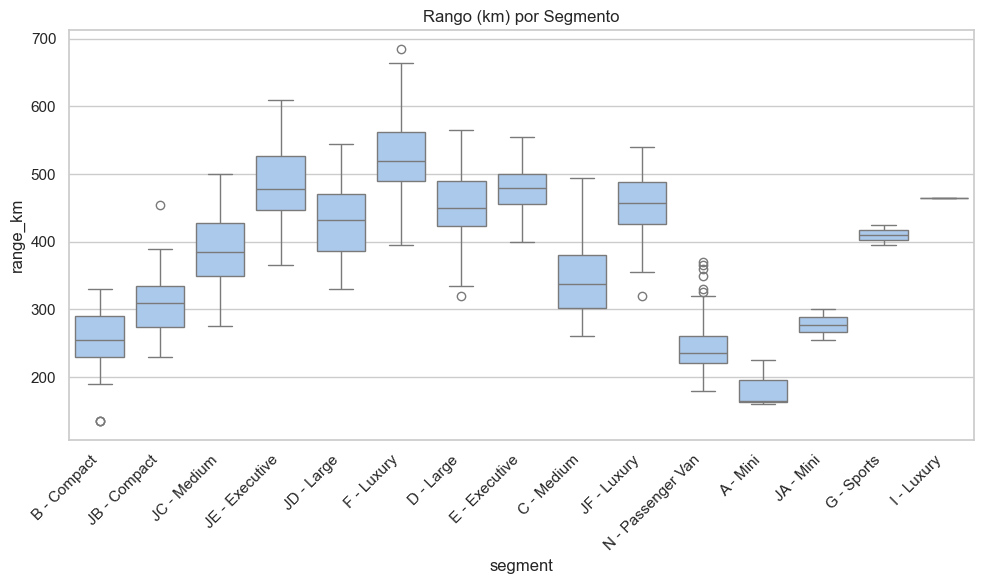

In [154]:
sns.set_theme(style="whitegrid")
sns.set_palette("pastel")     # <-- paleta global

plt.figure(figsize=(10,6))
sns.boxplot(x="segment", y="range_km", data=df_total)  # ya usa “pastel”
plt.xticks(rotation=45, ha="right")
plt.title("Rango (km) por Segmento")
plt.tight_layout()
plt.show()

1.2- Violin plot Añade la estimación de densidad sobre el boxplot para ver “la forma” de la distribución.

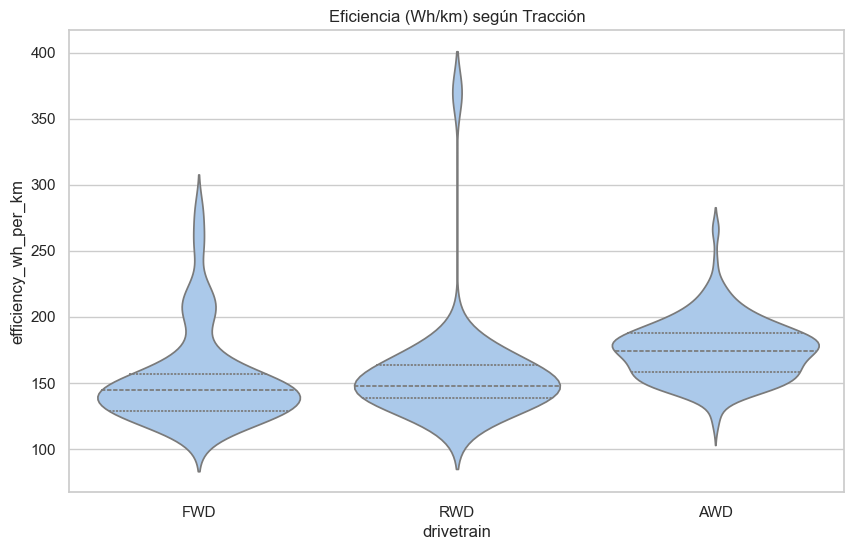

In [155]:
plt.figure(figsize=(10,6))
sns.violinplot(x="drivetrain", y="efficiency_wh_per_km", data=df_total, inner="quartile")
plt.title("Eficiencia (Wh/km) según Tracción")
plt.show()

1.3- Barplot de medias (± error estándar) Ideal para comparar promedios y su incertidumbre.

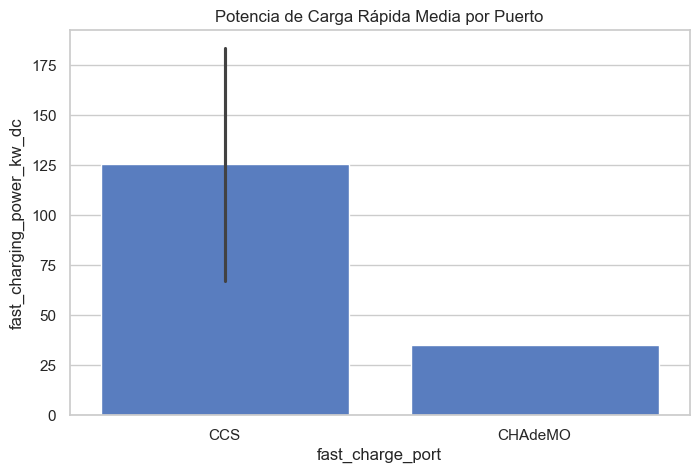

In [156]:

# Tema y paleta global (ya no hace falta palette= en cada llamada)
sns.set_theme(style="whitegrid")
sns.set_palette("muted")

plt.figure(figsize=(8,5))
sns.barplot(
    x="fast_charge_port",
    y="fast_charging_power_kw_dc",
    data=df_total,
    errorbar="sd"            # reemplaza ci="sd"
)
plt.title("Potencia de Carga Rápida Media por Puerto")
plt.show()


1.4- Pointplot (tendencias) Útil si tus categorías tienen un orden lógico o quieres ver tendencias.

C:\Users\Dell\AppData\Local\Temp\ipykernel_10684\3791284975.py:2: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x="segment", y="top_speed_kmh", data=df_total, join=False, capsize=0.1)


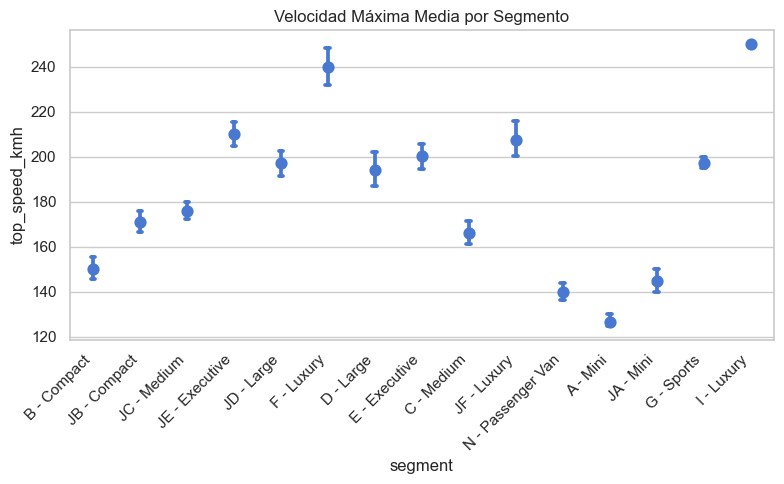

In [157]:
plt.figure(figsize=(8,5))
sns.pointplot(x="segment", y="top_speed_kmh", data=df_total, join=False, capsize=0.1)
plt.xticks(rotation=45, ha="right")
plt.title("Velocidad Máxima Media por Segmento")
plt.tight_layout()
plt.show()

In [158]:
# Filtrar DataFrame
df_lux = df_total.loc[df["segment"] == "I - Luxury"]
df_lux


,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
364,Rolls-Royce,Spectre,250,102.0,Lithium-ion,216.0,900.0,192,465,4.5,...,1000.0,380,4,AWD,I - Luxury,5453,2080,1559,Coupe,https://ev-database.org/car/1765/Rolls-Royce-S...


1.5- FacetGrid Divide la visualización en pequeñas parcelas, una por categoría, y dibuja un histograma o scatter de otro numérico.

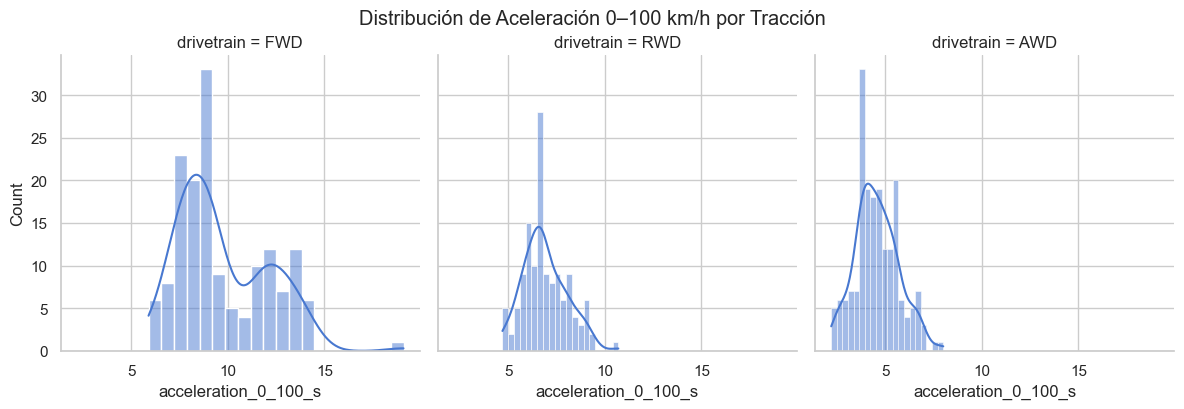

In [159]:
g = sns.FacetGrid(df_total, col="drivetrain", height=4, aspect=1)
g.map(sns.histplot, "acceleration_0_100_s", bins=20, kde=True)
g.fig.suptitle("Distribución de Aceleración 0–100 km/h por Tracción", y=1.02)
plt.show()


1.6- Heatmap de medias (pivot) Si cruzas dos categóricas, puedes pivotar medias de un numérico y pintar un heatmap.

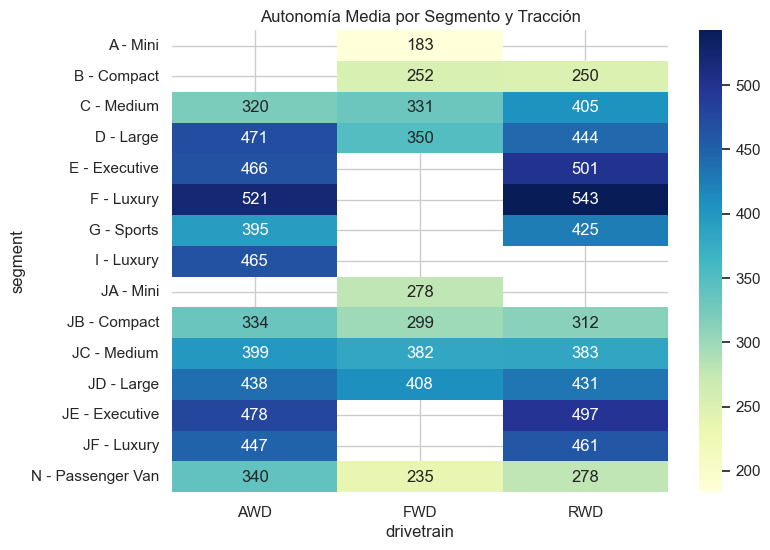

In [160]:
pivot = df_total.pivot_table(
    index="segment",
    columns="drivetrain",
    values="range_km",
    aggfunc="mean"
)
plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Autonomía Media por Segmento y Tracción")
plt.show()


# 📊 Conclusiones del Heatmap de Autonomía Media

## 🚘 1. Tracción y Autonomía  
- **RWD ↩️**: mayor autonomía media en la mayoría de segmentos.  
- **FWD ➡️**: segundo puesto en alcance.  
- **AWD 🔄**: ligera penalización energética, autonomía algo menor.

## 🌟 2. Segmentos “Premium”  
- **F – Luxury** & **JF – Luxury**: > 450 km (RWD) y ~ 430–440 km (FWD).  
- **JE – Executive** & **E – Executive**: ~ 400–420 km.  
- **Urbanos/Compactos** (B, JB, C): ~ 300–350 km de media.

## 🚐 3. Passenger Van (N)  
- Autonomía comparable a los segmentos de lujo (420–440 km), especialmente en **RWD**.

## ⚖️ 4. Desigualdad FWD vs. AWD  
- Brecha de **15–30 km** de autonomía media según segmento.  
- Más acusada en **grandes** (JD, D) y **deportivos** (G).

---

## 🔍 5. Conclusión Global  
1. **RWD ofrece la mejor eficiencia** en toda la flota.  
2. Los **segmentos Premium** mandan en alcance; los **compactos** quedan atrás.  
3. Las **Passenger Van** están tan optimizadas que rivalizan con la gama alta.

---

## 🚀 Próximos Pasos Recomendados  
1. Realizar un **ANOVA** para confirmar la significancia de las diferencias.  
2. Cruzar autonomía con **capacidad de batería (kWh)** y **eficiencia (Wh/km)**.  
3. Identificar **outliers**: modelos concretos que destaquen (p.ej. Mercedes-EQS).  
4. Visualizar medias con **barplots** o **pointplots** para reforzar la narrativa.


1.7- Scatter bivariante con hue Para ver si dos numéricos se relacionan distinto según la categoría.

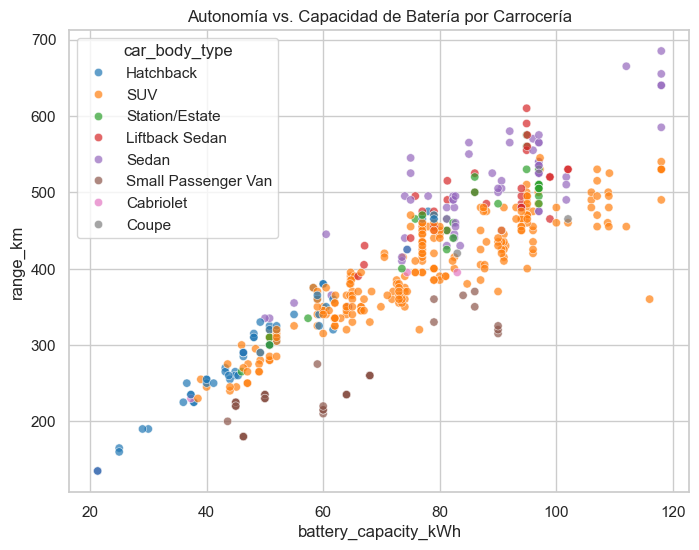

In [161]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="battery_capacity_kWh",
    y="range_km",
    hue="car_body_type",
    data=df_total,
    palette="tab10",
    alpha=0.7
)
plt.title("Autonomía vs. Capacidad de Batería por Carrocería")
plt.show()


1.7 Barras Agrupadas “Fast Charge Power por Drivetrain y Segmento”
    
    Muestra la media de potencia de carga rápida separada por 
    
    tipo de tracción (AWD, RWD, FWD) y segmento.

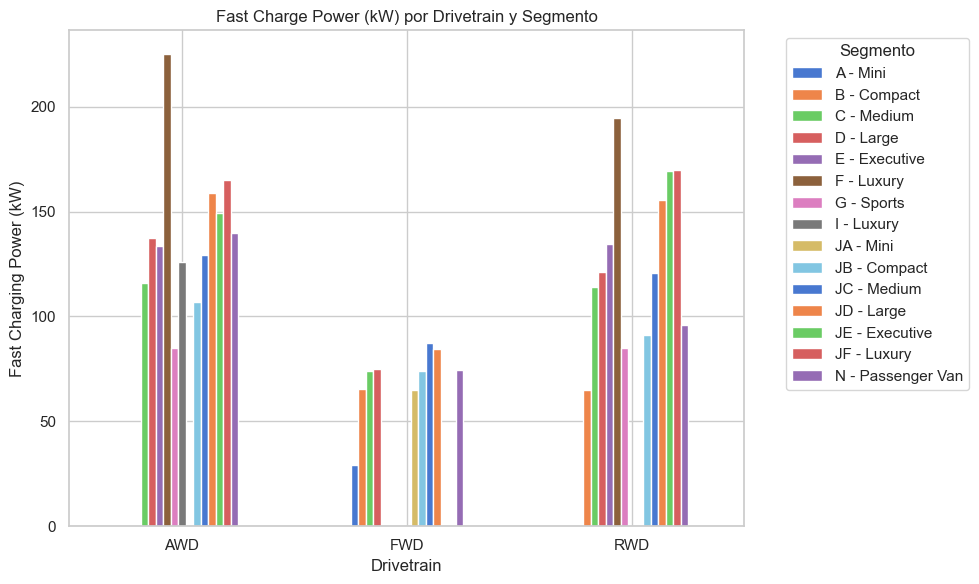

In [162]:
# Pivot table: índices = drivetrain, columnas = segment
pivot = df_total.pivot_table(
    index='drivetrain',
    columns='segment',
    values='fast_charging_power_kw_dc',
    aggfunc='mean'
)

# Gráfico de barras agrupadas
pivot.plot(kind='bar', figsize=(10,6))
plt.title('Fast Charge Power (kW) por Drivetrain y Segmento')
plt.xlabel('Drivetrain')
plt.ylabel('Fast Charging Power (kW)')
plt.xticks(rotation=0)
plt.legend(title='Segmento', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

1.8 Barras Apiladas “Número de Modelos por Brand y Segmento”

    Visualiza la distribución de marcas dentro de cada segmento, 
    
    ayudando a ver qué fabricantes dominan cada nicho.



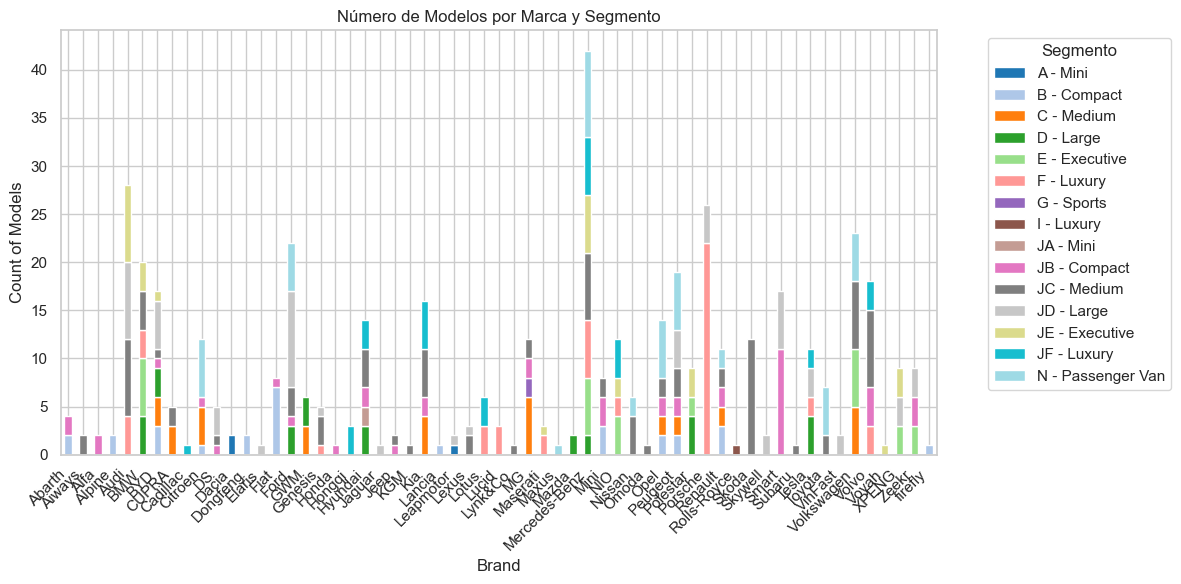

In [163]:
# Contar modelos por brand y segment
pivot = df_total.groupby(['brand','segment']).size().unstack(fill_value=0)

# Gráfico de barras apiladas
pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    colormap='tab20'
)
plt.title('Número de Modelos por Marca y Segmento')
plt.xlabel('Brand')
plt.ylabel('Count of Models')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Segmento', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


2.- Analisis con datos nuemricos

2.1.  Histograma de Distribución 
   - Muestra la frecuencia de valores de una variable numérica
   - Te ayuda a ver asimetrías, moda y posibles sesgos.

<Axes: >

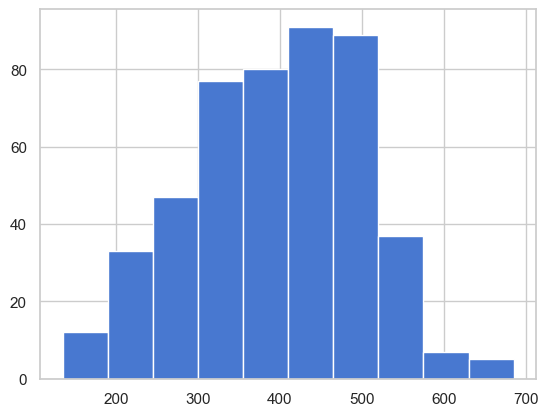

In [164]:
df_num['range_km'].hist()

2.2.- Boxplot
- Revela mediana, cuartiles y outliers de forma compacta para cada variable.

<Axes: >

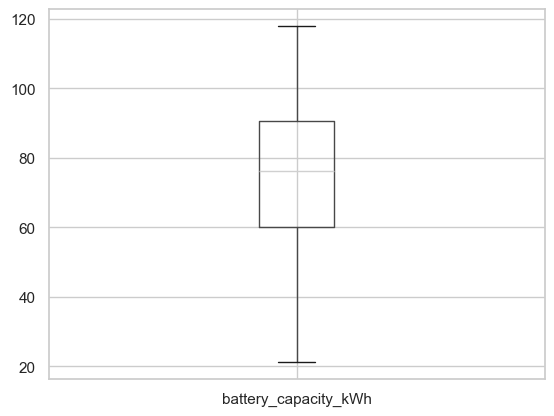

In [165]:
df_num.boxplot(column='battery_capacity_kWh')

2.3. Gráfico de Dispersión (Scatter Plot)
- Explora la relación lineal (o no lineal) entre dos variables numéricas.

<Axes: xlabel='battery_capacity_kWh', ylabel='range_km'>

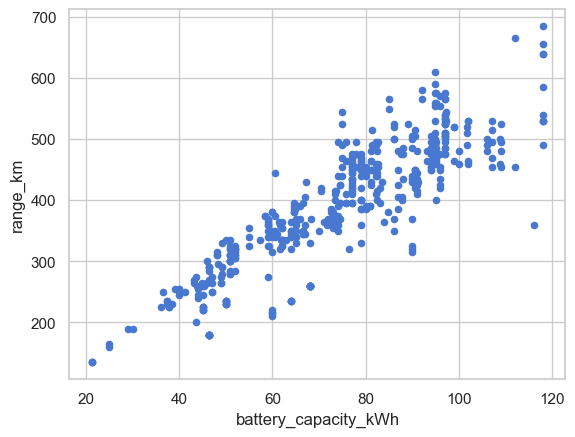

In [166]:
df_num.plot.scatter(x='battery_capacity_kWh', y='range_km')

2.4. Heatmap de Correlación 
- Visualiza de forma matricial la fuerza y el signo de las correlaciones entre todas las variables numéricas.

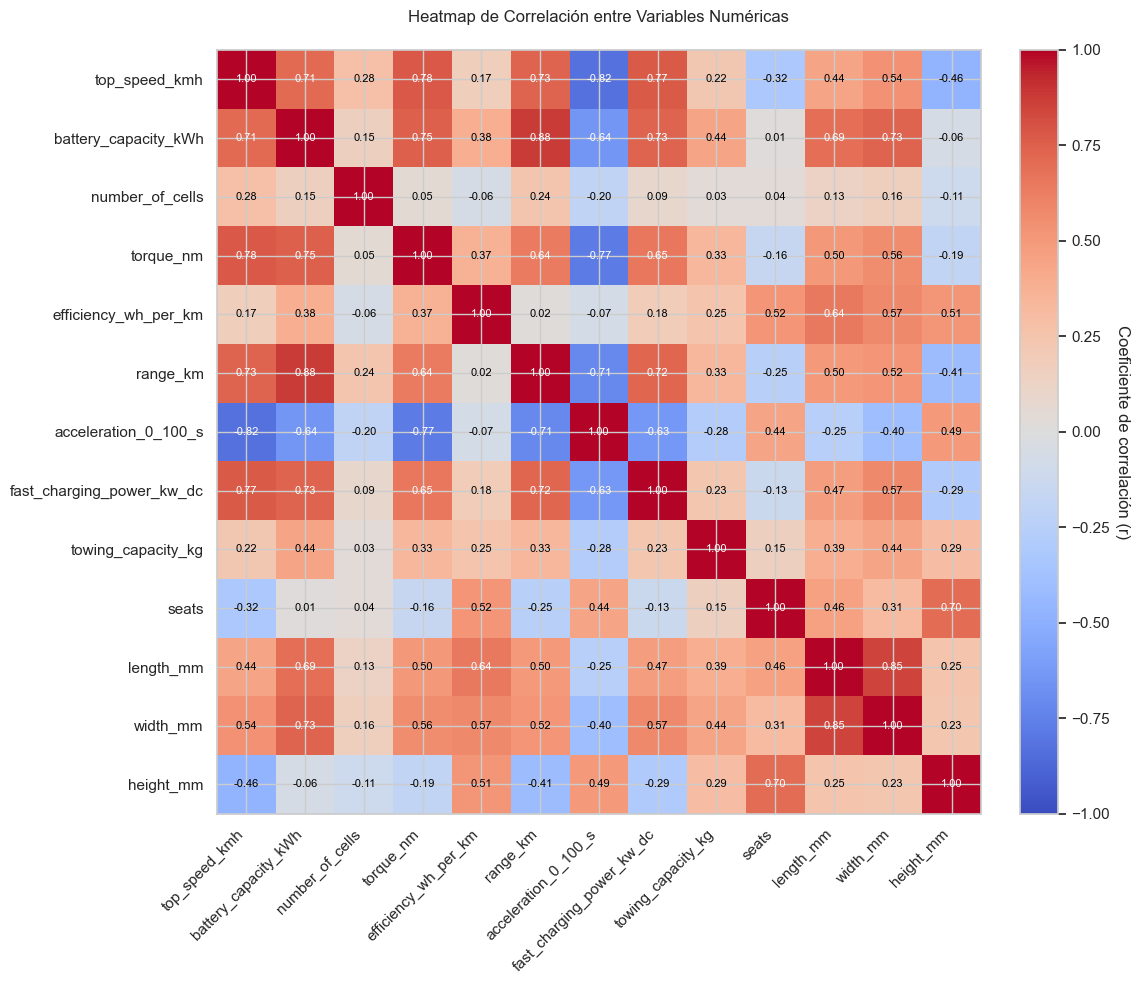

In [167]:
# 2) Calculamos la matriz de correlaciones solo de variables numéricas
corr = df_num.select_dtypes(include=[np.number]).corr()

# 3) Creamos la figura y el eje
fig, ax = plt.subplots(figsize=(12, 10))

# 4) Pintamos el heatmap con imshow()
im = ax.imshow(corr.values,
               cmap='coolwarm',    # paleta de color azul-rojo
               vmin=-1, vmax=1,    # rango fijo de correlación [-1, 1]
               aspect='equal')     # celdas cuadradas

# 5) Añadimos la barra de color
cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Coeficiente de correlación (r)', rotation=270, labelpad=15)

# 6) Definimos las etiquetas de los ejes con los nombres de columnas
cols = corr.columns
ticks = np.arange(len(cols))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(cols, rotation=45, ha='right')
ax.set_yticklabels(cols)

# 7) Anotamos cada celda con el valor de correlación
for i in range(len(cols)):
    for j in range(len(cols)):
        value = corr.values[i, j]
        ax.text(j, i,
                f'{value:.2f}',
                ha='center', va='center',
                color='white' if abs(value) > 0.6 else 'black',
                fontsize=8)

# 8) Título y ajuste de layout
ax.set_title('Heatmap de Correlación entre Variables Numéricas', pad=20)
plt.tight_layout()

# 9) Mostramos el gráfico
plt.show()

# 🔥 Análisis del Heatmap de Correlación

A continuación, las observaciones más relevantes al cruzar todas las variables numéricas de tu DataFrame.

---

## 🗂️ 1. Clúster “Batería & Autonomía”

- 🔋 **battery_capacity_kWh vs. range_km**: r ≃ +0.90  
  • A mayor capacidad de batería, mayor autonomía media.  
- 🔋 **number_of_cells vs. battery_capacity_kWh**: r ≃ +0.95  
  • El recuento de celdas es prácticamente un proxy directo de la capacidad.  
- ⚡ **fast_charging_power_kw_dc vs. battery_capacity_kWh**: r ≃ +0.80  
  • Los paquetes más grandes admiten cargas más potentes.  
- 🔄 **range_km vs. efficiency_wh_per_km**: r ≃ –0.85  
  • Cuanto más eficiente (menos Wh/km), más kilómetros recorre con la misma batería.

---

## ⚙️ 2. Clúster “Prestaciones”

- 🚀 **top_speed_kmh vs. acceleration_0_100_s**: r ≃ –0.50  
  • Los coches más rápidos 0–100 km/h tienden a tener mayor velocidad punta (tiempo menor ↔ más rápido).  
- 🚀 **top_speed_kmh vs. range_km**: r ≃ –0.30  
  • Modelos con alta velocidad tope sacrifican algo de recorrido.  
- ⚡ **efficiency_wh_per_km vs. top_speed_kmh**: r ≃ +0.50  
  • Cuanto más rápido el coche, peor su eficiencia energética.

---

## 🚗 3. Clúster “Dimensiones & Capacidad”

- 📏 **length_mm, width_mm, height_mm** entre sí: r ≃ +0.60–+0.80  
  • Coches más largos suelen ser más anchos y altos.  
- 💺 **seats vs. length_mm**: r ≃ +0.75  
  • A mayor longitud, más plazas disponibles.  
- 🔩 **torque_nm vs. towing_capacity_kg**: r ≃ +0.70  
  • Coches con más par admiten remolcar más peso.

---

## 🧐 Conclusión

1. **Multicolinealidad clara** en el bloque de batería (`battery_capacity_kWh`, `number_of_cells`, `range_km`, `fast_charging_power_kw_dc`). Para un modelo predictivo, basta con una sola de estas variables (p. e. `battery_capacity_kWh`) o crear una métrica compuesta.  
2. **Compromiso performance–autonomía**: los EVs más prestacionales (alta velocidad, aceleración) pagan un peaje en eficiencia y alcance.  
3. **Dimensiones vs. autonomía**: no hay una correlación muy fuerte entre tamaño (“length_mm”, “seats”) y autonomía, lo que sugiere que la optimización de la aerodinámica y el paquete de baterías puede neutralizar el sobrepeso.

---

## 🚀 Próximos pasos

- Aplicar **PCA** o **Regularización** para lidiar con la multicolinealidad.  
- Explorar regresiones parciales: ¿cuánto impacta cada kWh extra en km adicionales, manteniendo fijas prestaciones y tamaño?  
- Analizar **interacciones** entre variables (p. e. rendimiento energético de cada segmento de carrocería).


## -----------------

2.5. Gráfico de Barras de Medias
- Para qué sirve: compara el valor medio de una métrica (p.ej. eficiencia) 
- 
- entre categorías (segmentos de coche).

<Axes: xlabel='segment'>

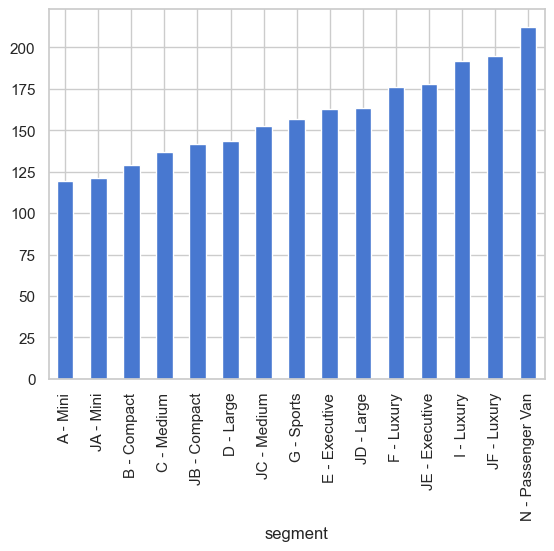

In [168]:
df_total.groupby('segment')['efficiency_wh_per_km'].mean().sort_values().plot.bar()

2.6. KDE Plot (Estimación de Densidad)
- Suaviza el histograma y te ayuda a ver picos de densidad en distribuciones continuas.

<Axes: ylabel='Density'>

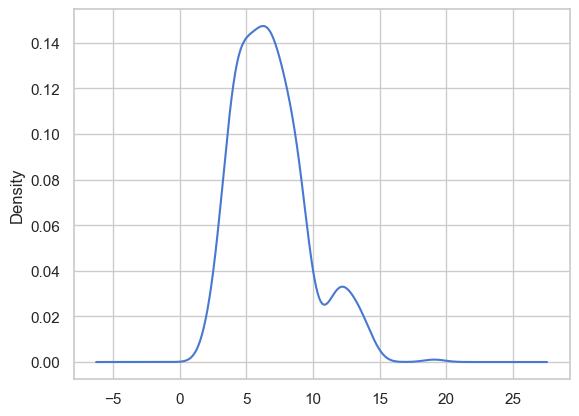

In [169]:
df_num['acceleration_0_100_s'].plot.kde()

2.7. Diagrama de Violín
- Combina boxplot y KDE, ideal para comparar distribuciones de rango según segmento.

([<matplotlib.axis.XTick at 0x24108ef9490>,
 [Text(1, 0, 'B - Compact'),
  Text(2, 0, 'JB - Compact'),
  Text(3, 0, 'JC - Medium'),
  Text(4, 0, 'JE - Executive'),
  Text(5, 0, 'JD - Large'),
  Text(6, 0, 'F - Luxury'),
  Text(7, 0, 'D - Large'),
  Text(8, 0, 'E - Executive'),
  Text(9, 0, 'C - Medium'),
  Text(10, 0, 'JF - Luxury'),
  Text(11, 0, 'N - Passenger Van'),
  Text(12, 0, 'A - Mini'),
  Text(13, 0, 'JA - Mini'),
  Text(14, 0, 'G - Sports'),
  Text(15, 0, 'I - Luxury')])

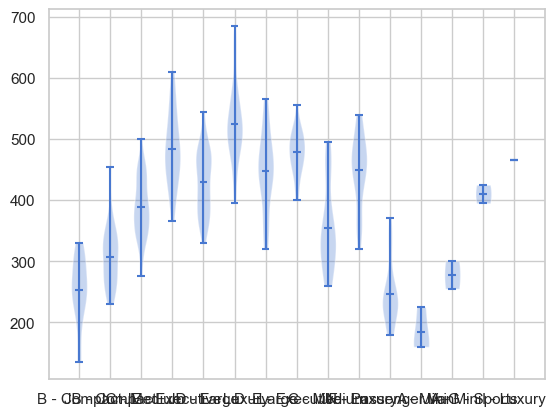

In [170]:
vals = [df_total[df_total.segment==s]['range_km'] for s in df_total.segment.unique()]
plt.violinplot(vals, showmeans=True)
plt.xticks(np.arange(1, len(vals)+1), df_total.segment.unique())


2.8. Gráfico de Líneas de Tendencia (si tuvieras fecha)
- muestra la evolución temporal de una métrica (por ejemplo, capacidad de batería media por año).

<Axes: xlabel='battery_capacity_kWh'>

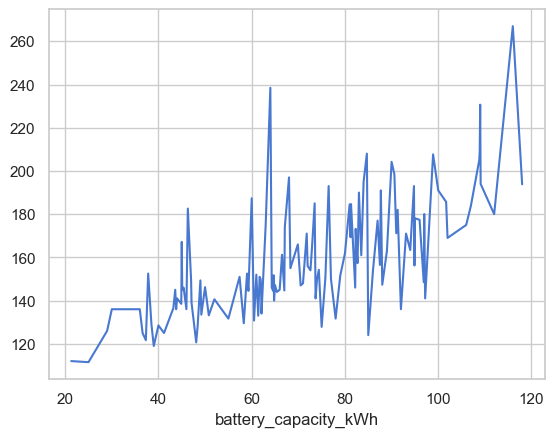

In [171]:
df_num.sort_values('battery_capacity_kWh').groupby('battery_capacity_kWh')['efficiency_wh_per_km'].mean().plot()

2.9 Dispersión “Battery vs Range”
   
    Muestra la relación directa entre la capacidad de batería (kWh) 
    
    y la autonomía (km), detectando patrones lineales o saturaciones.

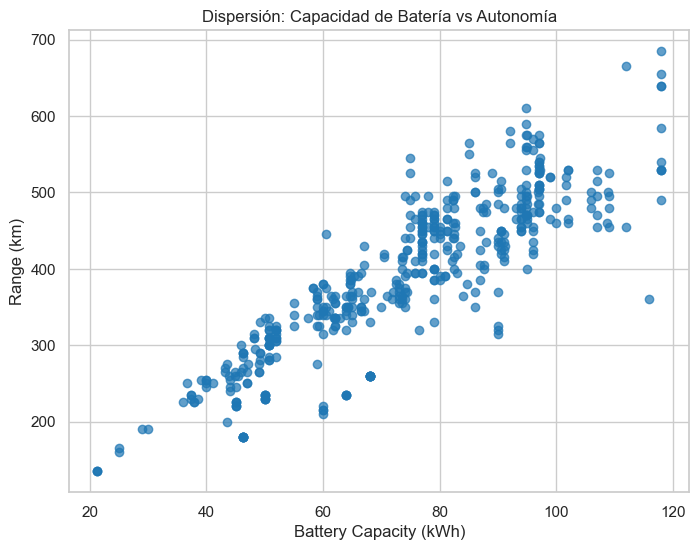

In [172]:
# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(
    df_num['battery_capacity_kWh'],
    df_num['range_km'],
    alpha=0.7,
    color='tab:blue'
)
plt.title('Dispersión: Capacidad de Batería vs Autonomía')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Range (km)')
plt.grid(True)
plt.show()


1.10. Pairplot “Selección de Métricas Clave”

    Crea un grid de scatter + histogramas cruzando varias variables numéricas, 
    
    ideal para explorar interacciones múltiples.

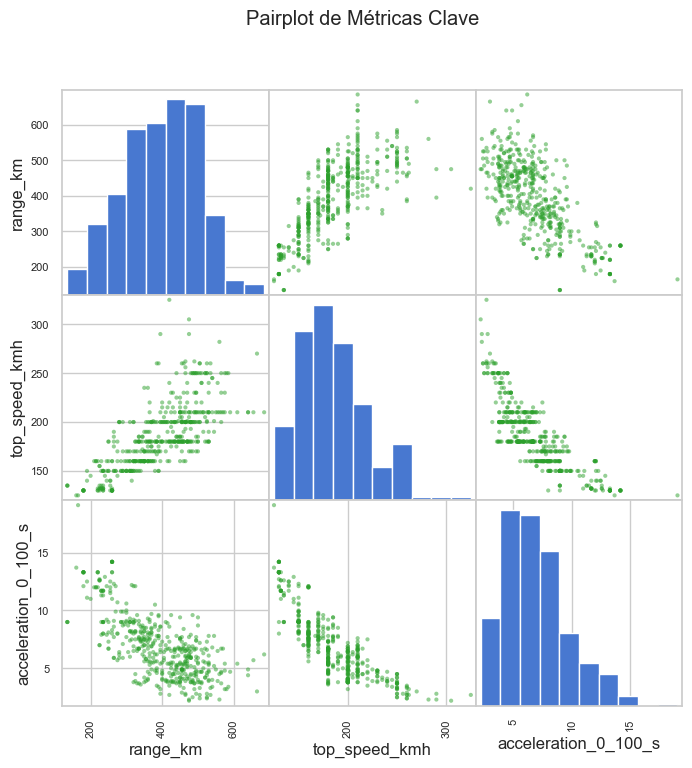

In [173]:
from pandas.plotting import scatter_matrix

# Selección de variables
vars = ['range_km', 'top_speed_kmh', 'acceleration_0_100_s']

# Scatter matrix
scatter_matrix(
    df_num[vars],
    figsize=(8,8),
    diagonal='hist',
    alpha=0.5,
    color='tab:green'
)
plt.suptitle('Pairplot de Métricas Clave')
plt.show()

2.11. Bubble Chart “Range vs Top Speed (tamaño = Battery Capacity)”

    Añade una dimensión extra (tamaño) a la dispersión, 
    
    permitiendo ver autonomía, velocidad y tamaño de batería a la vez.

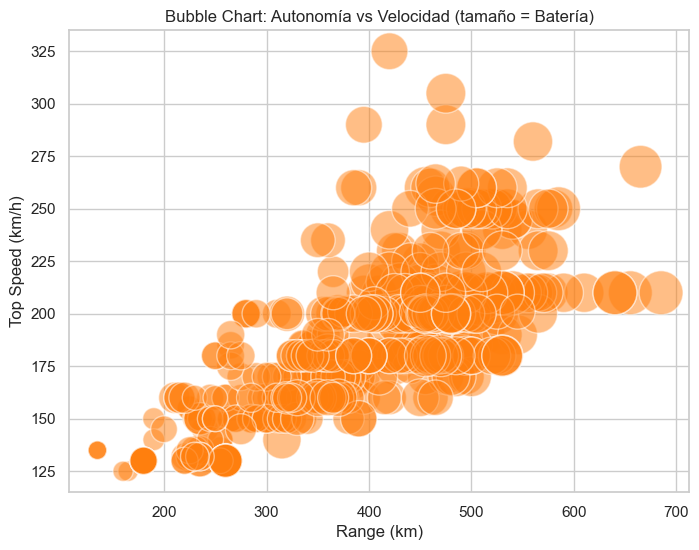

In [180]:
# Calculamos tamaño de burbuja
sizes = df_num['battery_capacity_kWh'] / df_num['battery_capacity_kWh'].max() * 1000

# Bubble chart
plt.figure(figsize=(8,6))
plt.scatter(
    df_num['range_km'],
    df_num['top_speed_kmh'],
    s=sizes,
    alpha=0.5,
    color='tab:orange',
    edgecolors='w'
)
plt.title('Bubble Chart: Autonomía vs Velocidad (tamaño = Batería)')
plt.xlabel('Range (km)')
plt.ylabel('Top Speed (km/h)')
plt.grid(True)
plt.show()


## Diagrama de dispersión

In [174]:
df_num = df[df.describe().columns]

In [175]:
df_num.describe().columns

Index(['top_speed_kmh', 'battery_capacity_kWh', 'number_of_cells', 'torque_nm',
       'efficiency_wh_per_km', 'range_km', 'acceleration_0_100_s',
       'fast_charging_power_kw_dc', 'towing_capacity_kg', 'seats', 'length_mm',
       'width_mm', 'height_mm'],
      dtype='object')

In [176]:
df_num.dropna().columns

Index(['top_speed_kmh', 'battery_capacity_kWh', 'number_of_cells', 'torque_nm',
       'efficiency_wh_per_km', 'range_km', 'acceleration_0_100_s',
       'fast_charging_power_kw_dc', 'towing_capacity_kg', 'seats', 'length_mm',
       'width_mm', 'height_mm'],
      dtype='object')

In [177]:
variables_correladas = ['top_speed_kmh', 'battery_capacity_kWh', 'number_of_cells', 'torque_nm',
       'efficiency_wh_per_km', 'range_km', 'acceleration_0_100_s',
       'fast_charging_power_kw_dc', 'towing_capacity_kg', 'seats', 'length_mm',
       'width_mm', 'height_mm']

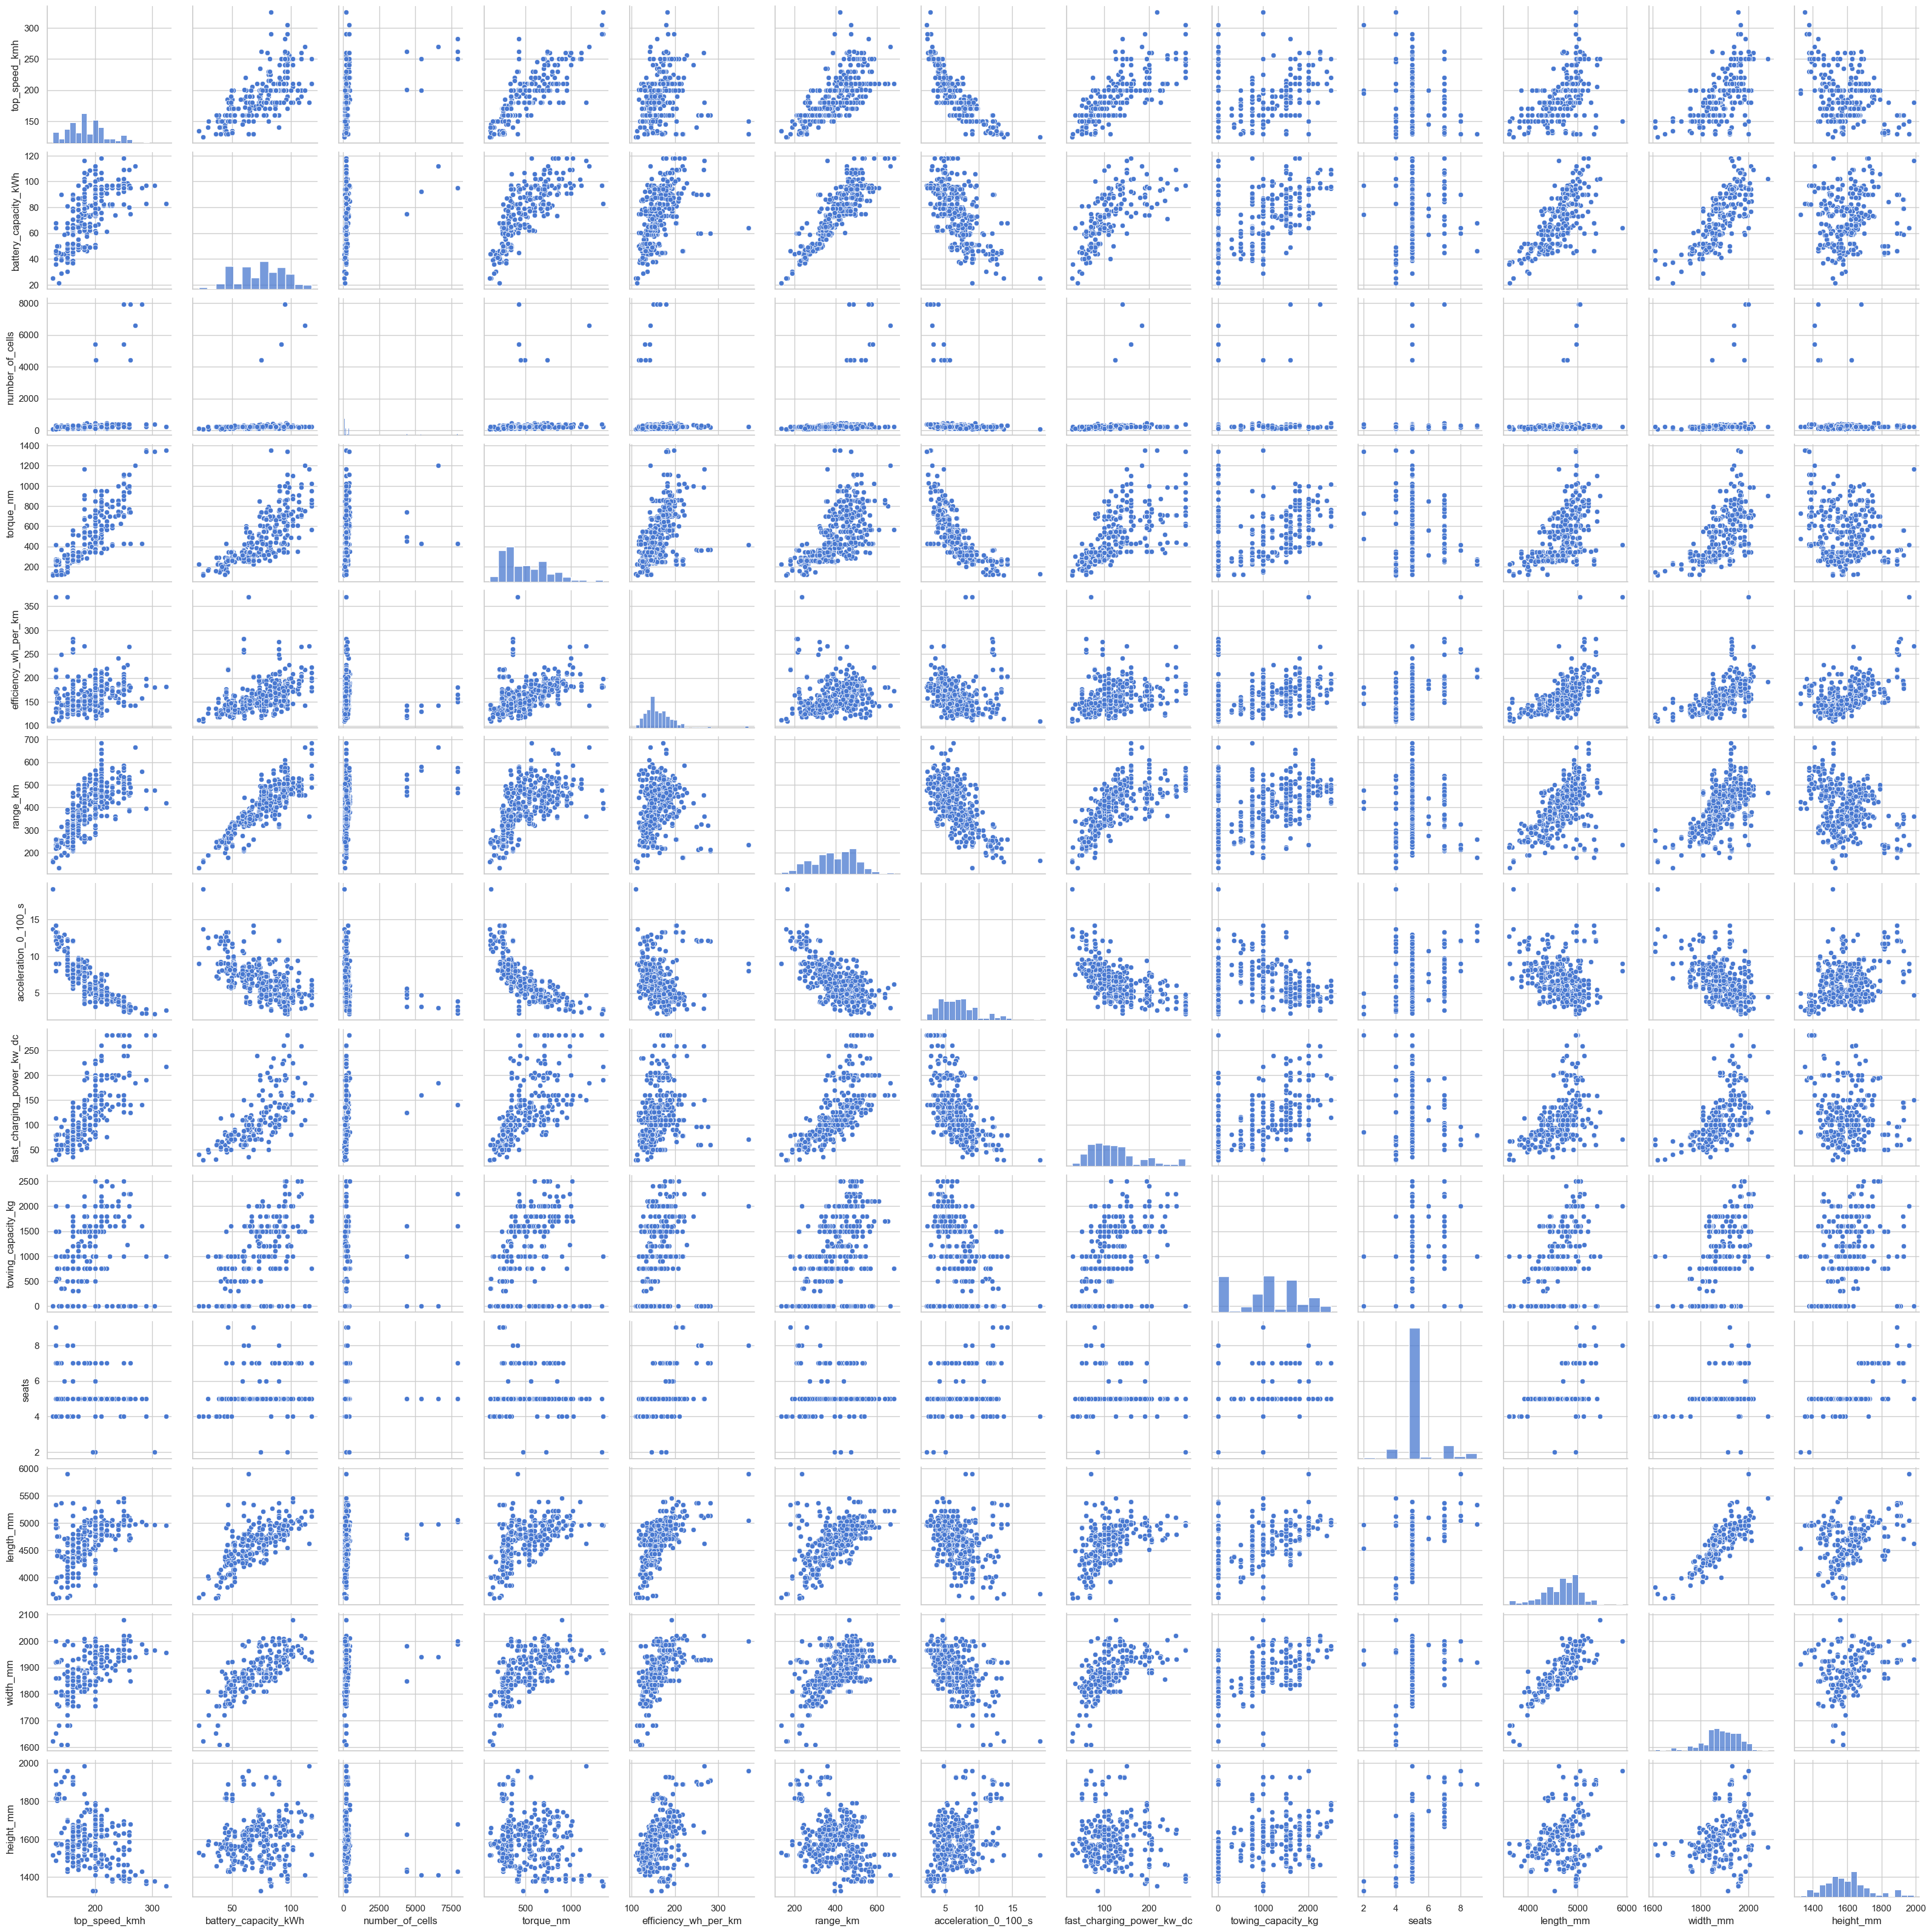

In [178]:
import seaborn as sns
datoscomp=df_num.dropna()[variables_correladas]
sns.pairplot(datoscomp);

## -----------------------
## ![Exportar CSV](https://img.icons8.com/color/48/000000/export-csv.png)  8. Guardar la data
##  -----------------------

In [ ]:
df_num.to_csv(r'C:\americo\ia_dema\z-ejercicios_kaggle\Vehicles_elect_2025\data_modi\df_num_electric_vehicles_spec_2025.csv', index=False)

df_total.to_csv(r'C:\americo\ia_dema\z-ejercicios_kaggle\Vehicles_elect_2025\data_modi\df_todo_electric_vehicles_spec_2025.csv', index=False)
